In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1. Подберите скорость обучения (eta) и количество итераций

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

X.shape

(10, 2)

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

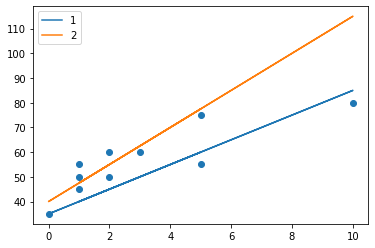

In [5]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

In [6]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

In [7]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

In [8]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [9]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

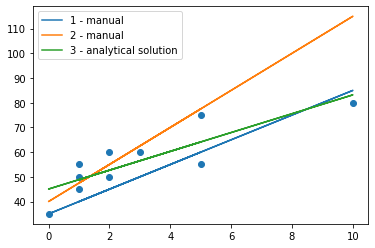

In [10]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [11]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [12]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [13]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [14]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875)

In [16]:
n = X.shape[0]

eta = 1e-02
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 50 == 0: # убрала eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #150: W_new = [34.51273915  5.72553647], MSE = 97.36
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #250: W_new = [40.84211409  4.57780191], MSE = 52.51
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #350: W_new = [43.37415299  4.1186557 ], MSE = 45.34
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #450: W_new = [44.38708413  3.93497626], MSE = 44.19
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #550: W_new = [44.79230282  3.86149609], MSE = 44.0
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #650: W_new = [44.95440879  3.83210067], MSE = 43.97
Iteration #700: W_new = [44.99413322  3.82

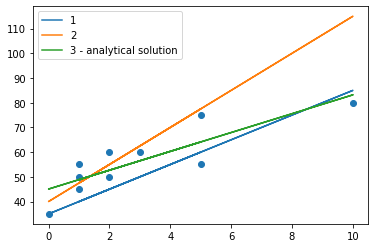

In [17]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.plot(X[:, 1], y_pred, label='3 - analytical solution')
plt.legend()
plt.show()